In [1]:
import numpy as np
import pandas as pd

In [2]:
train_ds = pd.read_csv("train.csv")

In [3]:
train_ds

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
train_ds.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


<AxesSubplot:>

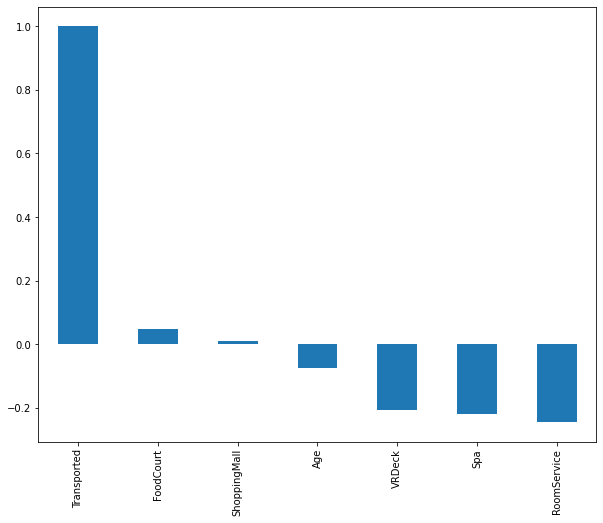

In [5]:
train_ds.corrwith(train_ds['Transported']).sort_values(ascending=False).plot(kind='bar', figsize=(10, 8))

In [6]:
lis = ['PassengerId', 'FoodCourt','Name', 'VIP', 'ShoppingMall']
for i in lis:
    train_ds = train_ds.drop(columns=i)
train_ds

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,109.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,43.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,303.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,0.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,0.0,353.0,3235.0,False


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
for i in train_ds.columns:
    if(i=='age' or i=='RoomService'):
        continue
    train_ds[i] = le.fit_transform(train_ds[i])

In [10]:
train_ds

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,Spa,VRDeck,Transported
0,1,0,149,2,39,0.0,0,0,0
1,0,0,2184,2,24,109.0,456,44,1
2,1,0,1,2,58,43.0,1273,49,0
3,1,0,1,2,33,0.0,1132,187,0
4,0,0,2186,2,16,303.0,470,2,1
...,...,...,...,...,...,...,...,...,...
8688,1,0,146,0,41,0.0,932,74,0
8689,0,1,5280,1,18,0.0,0,0,0
8690,0,0,5285,2,26,0.0,1,0,1
8691,1,0,2131,0,32,0.0,321,1113,0


In [15]:
features = train_ds.drop(columns='Transported')
features

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,Spa,VRDeck
0,1,0,149,2,39,0.0,0,0
1,0,0,2184,2,24,109.0,456,44
2,1,0,1,2,58,43.0,1273,49
3,1,0,1,2,33,0.0,1132,187
4,0,0,2186,2,16,303.0,470,2
...,...,...,...,...,...,...,...,...
8688,1,0,146,0,41,0.0,932,74
8689,0,1,5280,1,18,0.0,0,0
8690,0,0,5285,2,26,0.0,1,0
8691,1,0,2131,0,32,0.0,321,1113


In [17]:
labels = train_ds['Transported']
labels

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model1 = LogisticRegression(random_state =100,C=1.2, penalty='l2')